In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Correlations in Statistics

In [86]:
import numpy as np

In [87]:
import pandas as pd

In [88]:
import matplotlib.pyplot as plt

In [238]:
from functions.correlations import CorrelationDataFaker

In [239]:
x = np.linspace(0,100,101)
data_faker = CorrelationDataFaker(x)

In [240]:
fake_dataset = data_faker._curves()

In [241]:
fake_dataset.keys()

dict_keys(['linear+1', 'linear-1', 'vertical', 'flat', 'concave', 'convex'])

linear+1
linear-1
vertical
flat
concave
convex


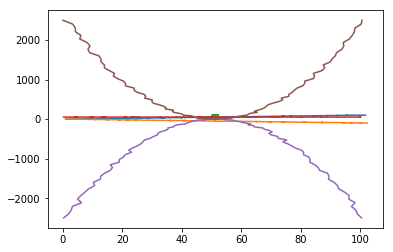

In [242]:
for name, val in fake_dataset.items():
    print(name)
    plt.plot(
        val.get('x'),
        val.get('y')
    )

In [243]:
import scipy.stats as ss

In [244]:
for name, val in fake_dataset.items():
    print(name)
    tau, p_value = ss.kendalltau(val.get('x'), val.get('y'))
    print(tau, p_value)


linear+1
0.987722772277228 1.6598088951397376e-48
linear-1
-0.9885148514851486 1.3966289343453324e-48
vertical
0.10930693069306933 0.10530083330217087
flat
-0.03445544554455446 0.6096650744421748
concave
0.0 1.0
convex
0.0 1.0


In [247]:
for name, val in fake_dataset.items():
    print(name)
    pearsonr, p_value = ss.pearsonr(val.get('x'), val.get('y'))
    print(tau, p_value)


linear+1
0.0 3.802566234792014e-149
linear-1
0.0 3.5587168866006405e-142
vertical
0.0 0.10093174898054313
flat
0.0 0.6006774560963752
concave
0.0 0.9640759212430116
convex
0.0 0.9791946785934075


In [248]:
from functions.correlations import cramers_v

Since the numbers only apprear once and we do not 

In [265]:
for name, val in fake_dataset.items():
    print(name)
    cramers = cramers_v(
        np.array(val.get('x')), 
        np.array(val.get('y'))
                )
    print(cramers)


linear+1
nan
linear-1
nan
vertical
nan
flat
nan
concave


/Users/leima/github/datumorphism/mini-code/statistics/functions/correlations.py:21: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


nan
convex
nan


In [263]:
x_test, y_test = np.random.randint(10, size=100), np.random.randint(10, size=100)
x_test = [val + idx for idx, val in enumerate(x_test)]
y_test = [val + idx for idx, val in enumerate(y_test)]

In [264]:
cramers_v(x_test, y_test)

0.18477649776080446

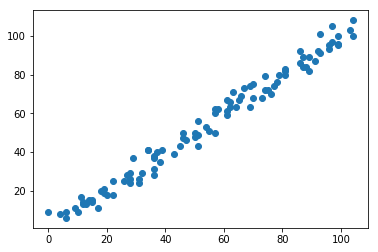

In [262]:
plt.scatter(x_test, y_test)